In [ ]:
# (그래프에 한글이 깨질경우) 아래 코드 실행 > '런타임: 세션 다시시작' 실행
!pip install matplotlib -U
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## **라이브러리 다운로드 및 불러오기**

In [ ]:
# 라이브러리 불러오기: 데이터 핸들링
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # plot "-" 부호 표기 설정
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px

In [ ]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

## **데이터**
  - 데이터명: 온라인 식료품전 데이터(Relay Foods)
  - 출처: 캐글 오픈 데이터(https://github.com/springcoil/marsmodelling)

In [ ]:
# 데이터 불러오기
df = pd.read_excel('https://github.com/springcoil/marsmodelling/blob/master/relay-foods.xlsx?raw=true',
                   sheet_name='Purchase Data - Full Study')
df.columns = ['주문ID', '주문날짜', '고객ID', '총요금', '공통ID', '픽업ID', '픽업날짜']


# 데이터 전처리
# 시각화 방법을 설명하고자 구매 빈도가 높은 Top5 고객의 데이터만 선별
select_user = list(df["고객ID"].value_counts()[:5].index)
df = df[(df['고객ID']==int(select_user[0]))|(df['고객ID']==int(select_user[1]))|
        (df['고객ID']==int(select_user[2]))|(df['고객ID']==int(select_user[3]))|(df['고객ID']==int(select_user[4]))]

# 임의변수 생성: 남자('47', '253') / 여자(나머지)
df = df.reset_index()
user_id = []

for i in range(0, len(df)):
  id = df["고객ID"][i]
  if (id == 47) or (id == 253):
    user_id.append(1) #남자(1)
  else:
    user_id.append(0) #여자(0)

df["성별"] = user_id
del df["index"]; del df["공통ID"]

print(df.shape)
df.tail()

(303, 7)


,주문ID,주문날짜,고객ID,총요금,픽업ID,픽업날짜,성별
298,2778,2010-02-11,4622,141.0612,4,2010-02-11,0
299,2808,2010-02-12,4622,76.3978,4,2010-02-12,0
300,2920,2010-02-19,4622,73.8750,4,2010-02-19,0
301,2991,2010-02-23,4622,82.4100,4,2010-02-23,0
302,3106,2010-03-02,4622,76.3100,4,2010-03-02,0


## **Distribution Plot**
  - 연속형 변수를 표현하는 시각화 방법
  - 데이터 분포 정도를 시각화하는 방법으로써 평균, 중위수, 범위, 분산, 편차 등 표현
  

## **Hist Plot**

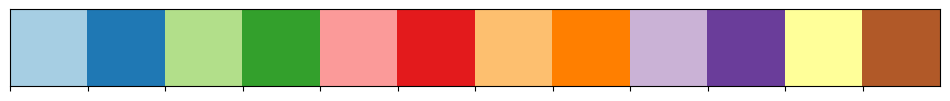

In [ ]:
# 시각화 옵션 함수
def plot_option():
    plt.rc('font', family='NanumGothic')
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (8,4)
    plt.xticks(size = 9, fontweight='bold')
    plt.yticks(size = 9, fontweight='bold')

sns.palplot(sns.color_palette("Paired"))

<Axes: title={'center': '단일: 총요금 분포'}, xlabel='총요금', ylabel='Count'>

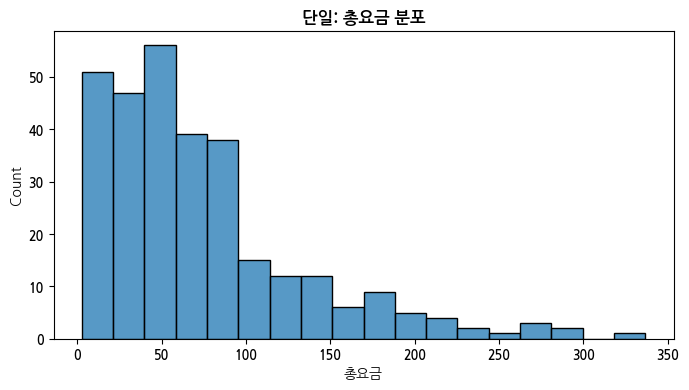

In [ ]:
# Hist Plot:
# 1. 변수에 대한 히스토그램 표시하여 관측수를 확인하기 유용
# 2. 하나 혹은 두개 변수의 분포를 나타내는 전형적인 시각화 방법

plot_option()
plt.title('단일: 총요금 분포', fontweight='bold')
sns.histplot(x=df['총요금'], palette='Paired')

<Axes: title={'center': '다중: 시간대별 총요금의 분포'}, xlabel='총요금', ylabel='주문날짜'>

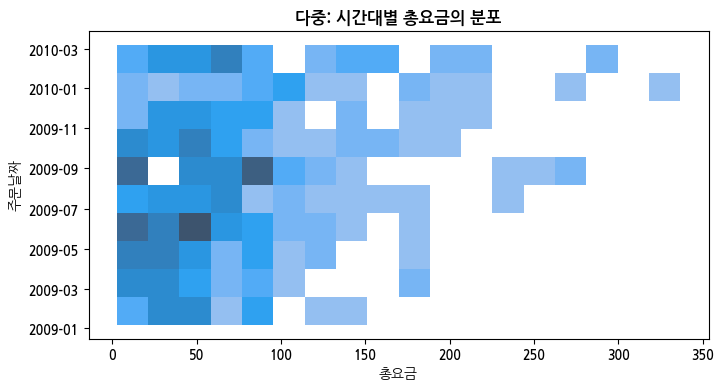

In [ ]:
plot_option()
plt.title('다중: 시간대별 총요금의 분포', fontweight='bold')
sns.histplot(x=df['총요금'], y=df['주문날짜'], palette='Paired')

<Axes: title={'center': '단일: 총요금 징량 밀도'}, xlabel='총요금', ylabel='Density'>

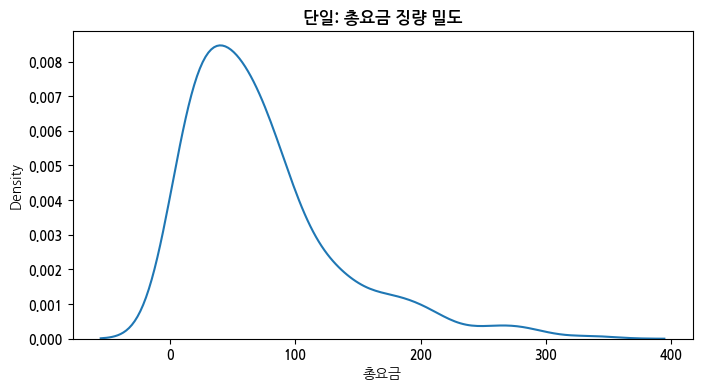

In [ ]:
# 커널밀도추정도(KDE Plot): 히스토그램을 스무딩해서 표현하는 방법으로써 밀도추정치를 표현하는 그래프
# 1. 하나 혹은 두개의 변수에 대한 분포를 시각화하여 연속된 곣선 그래프를 시각화
# 2. 밀도 추정치를 시각화(반면, histplot은 절대량 시각화)
#    ㄴ참고)  밀도 추정치란, 데이터로 부터 변수가 가질 수 있는 모든 값의 밀도(확률)을 추정

plot_option()
plt.title('단일: 총요금 징량 밀도', fontweight='bold')
sns.kdeplot(x=df['총요금'], palette='Paired')

<Axes: title={'center': '다중: 시간대별 총요금의 징량 밀도'}, xlabel='총요금', ylabel='주문날짜'>

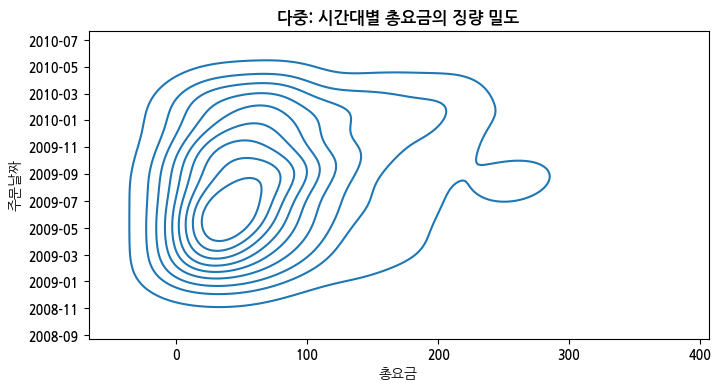

In [ ]:
plot_option()
plt.title('다중: 시간대별 총요금의 징량 밀도', fontweight='bold')
sns.kdeplot(x=df['총요금'], y=df['주문날짜'], palette='Paired')

<Axes: title={'center': '단일: 총요금 누적 분포'}, xlabel='총요금', ylabel='Proportion'>

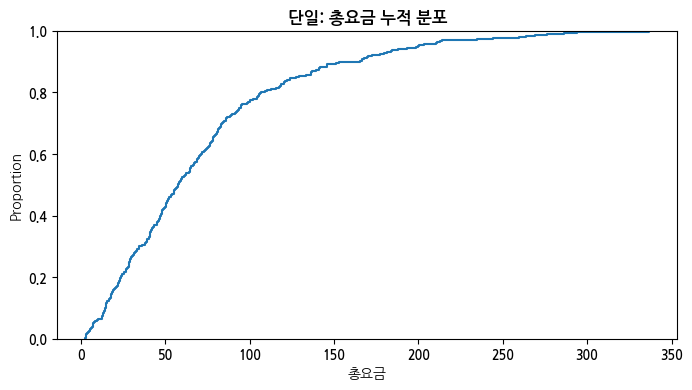

In [ ]:
# 경험적누적밀도(ECDF Plot):
# - 누적 분포를 시각화(실제 관측치의 비율을 시각화하는 장점)

plot_option()
plt.title('단일: 총요금 누적 분포', fontweight='bold')
sns.ecdfplot(x=df['총요금'], palette='Paired')

<Axes: title={'center': '단일: 총요금 징량 밀도와 주변 분포'}, xlabel='총요금', ylabel='Density'>

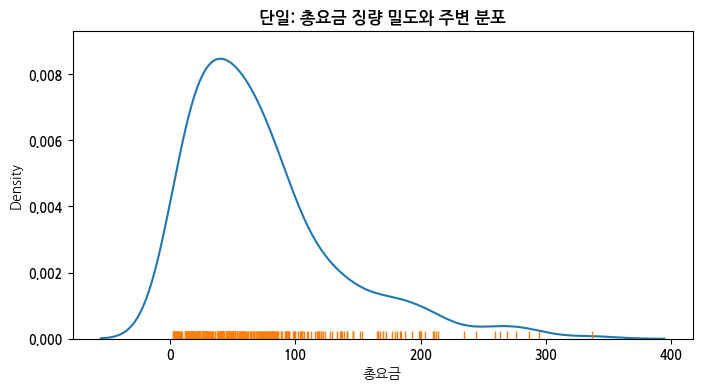

In [ ]:
# 러그플롯(Rug Plot):
# 1. X축과 Y축을 따라 눈금을 그려 주변 분포를 표시
# 2. 개발 관측치에 대한 위치를 보여줌으로써 다른 그림을 보완하는데 사용(단일로 사용하지 않는 그래프)

plot_option()
plt.title('단일: 총요금 징량 밀도와 주변 분포', fontweight='bold')
sns.kdeplot(x=df["총요금"], palette='Paired')  #파란색
sns.rugplot(x=df["총요금"], palette='Paired')  #주황색

## **Categorical Plot**
  - 범주형 변수를 표현하는 시각화 방법
  - 일변량(univariate) 혹은 이변량(bivariate) 분석에 자주 활용
    - 일변량: 종속변수(y) 1개
    - 이변량: 종속변수(y) 2개


<Axes: title={'center': '다중: 고객별 총요금 분포'}, xlabel='고객ID', ylabel='총요금'>

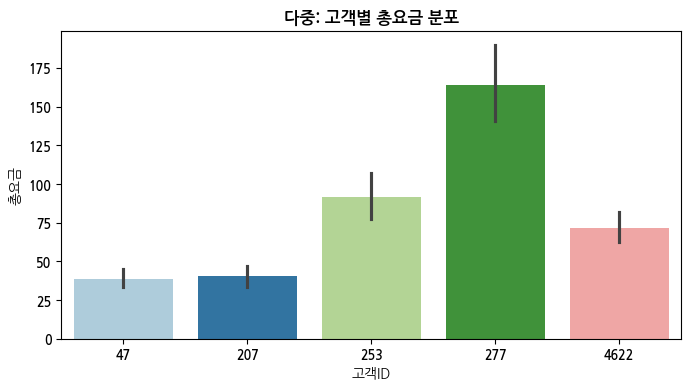

In [ ]:
# Bar Plot:
# 1. 이변량(bivariate) 분석을 위한 시각화 방법(x축, 범주형 변수 / y축, 연속형 변수)
# 2. 검정선은 신뢰구간을 의미하는 것으로 모수가 실제로 포함될 것으로 예측하는 범위

plot_option()
plt.title('다중: 고객별 총요금 분포', fontweight='bold')
sns.barplot(x = df["고객ID"], y = df["총요금"], palette='Paired')

<Axes: title={'center': '단일: 고객 빈도 분포'}, xlabel='고객ID', ylabel='count'>

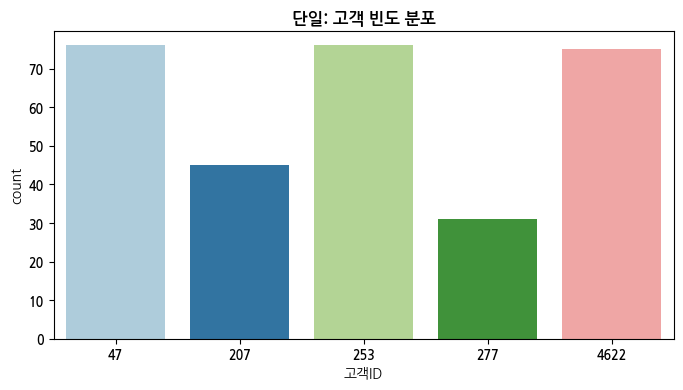

In [ ]:
# Count Plot:
# 1. 일변량(univariate) 분석을 위한 시각화 방법
# 2. 범주형 변수의 발생횟수를 나타내는 시각화 방법

plot_option()
plt.title('단일: 고객 빈도 분포', fontweight='bold')
sns.countplot(x = df['고객ID'], palette='Paired')

<Axes: title={'center': '단일: 총요금 분포'}, xlabel='총요금'>

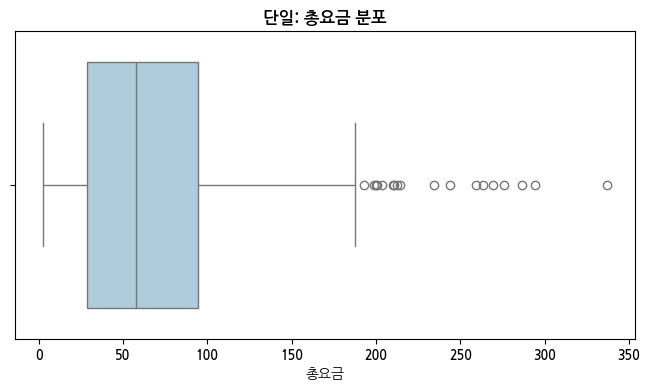

In [ ]:
# Box Plot
# 1. 최대(maximum)/최소(minimum)/평균/1사분위수/2사붐위수(중앙값)/3사분위수/극단치/이상치를 표현하는 시각화 방법
# 2. 특이값(극단치/이상치) 발견하기 유용
# 3. 단일 연속형 변수에 대한 수치 표현 혹은 연속형 변수를 기반으로 서로 다른 범주형 변수를 표현하기 적합

plot_option()
plt.title('단일: 총요금 분포', fontweight='bold')
sns.boxplot(x = df['총요금'], palette='Paired')

<Axes: title={'center': '다중: 고객별 총요금 분포'}, xlabel='고객ID', ylabel='총요금'>

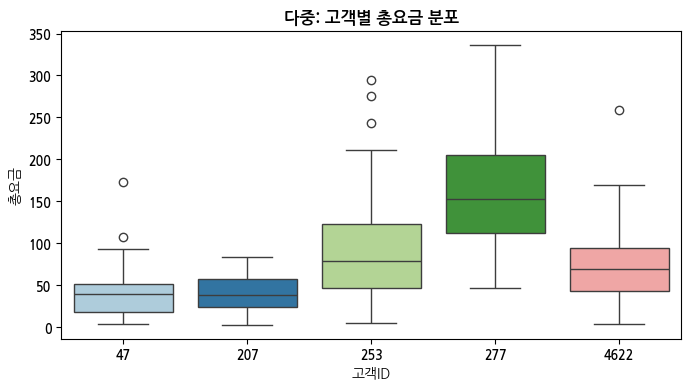

In [ ]:
plot_option()
plt.title('다중: 고객별 총요금 분포', fontweight='bold')
sns.boxplot(y = df['총요금'], x = df['고객ID'], palette='Paired')

<Axes: title={'center': '다중: 고객별 총요금 분포'}, xlabel='고객ID', ylabel='총요금'>

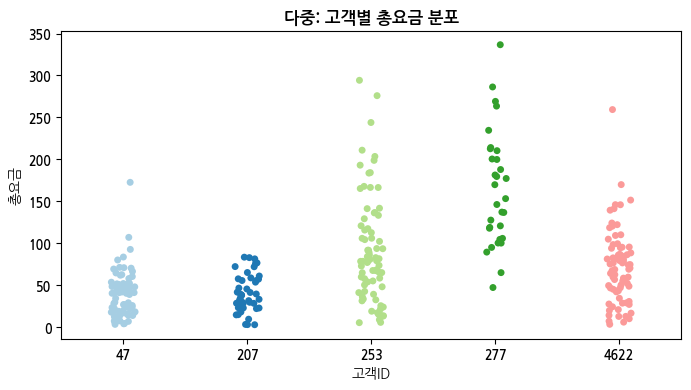

In [ ]:
# Strip Plot:
# 1. 연속형 변수와 범주형 변수 사이의 그래프
# 2. 산점도(scatter plot)로 표시되는데, 범주형 변수의 인코딩을 추가로 사용

plot_option()
plt.title('다중: 고객별 총요금 분포', fontweight='bold')
sns.stripplot(y=df['총요금'], x=df['고객ID'], palette='Paired')

<Axes: title={'center': '다중: 고객별 총요금 분포'}, xlabel='고객ID', ylabel='총요금'>

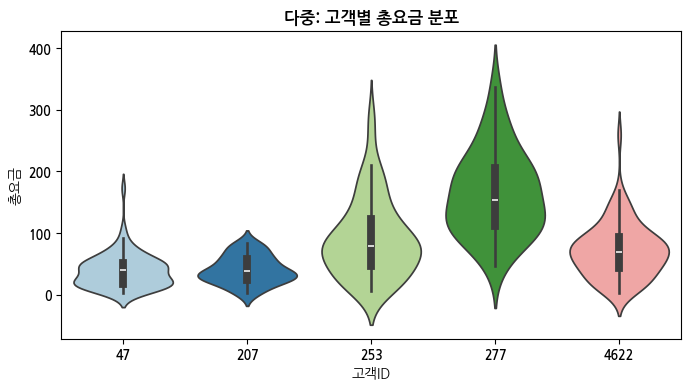

In [ ]:
# Violin Plot: Box Plot과 유사하며 분포에 대한 보충 정보를 제공

plot_option()
plt.title('다중: 고객별 총요금 분포', fontweight='bold')
sns.violinplot(y=df['총요금'], x=df['고객ID'], palette='Paired')

<Axes: title={'center': '다중: 고객별 총요금 분포'}, xlabel='고객ID', ylabel='총요금'>

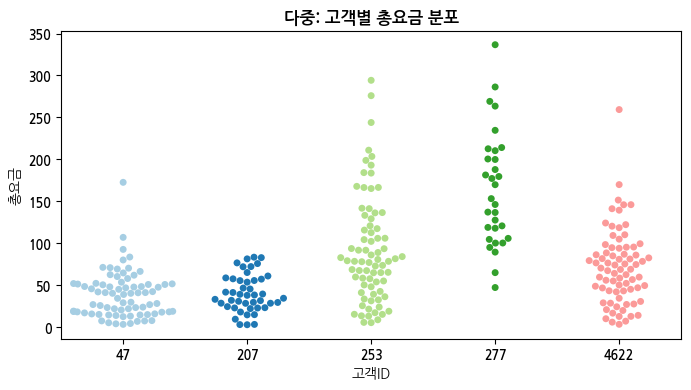

In [ ]:
# Swarm Plot:
# 1. Strip plot과 violin plot의 조합
# 2. 데이터 포인트 수와 분포를 함께 제공하는 시각화 방법

plot_option()
plt.title('다중: 고객별 총요금 분포', fontweight='bold')
sns.swarmplot(y = df['총요금'], x = df['고객ID'], palette='Paired')

## **Matrix Plot**
  - 2차원 행렬 데이터를 나타내는 시각화 방법

In [ ]:
df.corr()

,주문ID,주문날짜,고객ID,총요금,픽업ID,픽업날짜,성별
주문ID,1.000000,0.964049,0.101575,0.280537,0.525048,0.964187,-0.048885
주문날짜,0.964049,1.000000,0.162982,0.281295,0.485129,0.999981,-0.065420
고객ID,0.101575,0.162982,1.000000,0.003262,-0.056665,0.161805,-0.589807
총요금,0.280537,0.281295,0.003262,1.000000,0.106058,0.281410,-0.132842
픽업ID,0.525048,0.485129,-0.056665,0.106058,1.000000,0.485166,0.171666
픽업날짜,0.964187,0.999981,0.161805,0.281410,0.485166,1.000000,-0.064471
성별,-0.048885,-0.065420,-0.589807,-0.132842,0.171666,-0.064471,1.000000


<Axes: title={'center': '변수별 관계성'}>

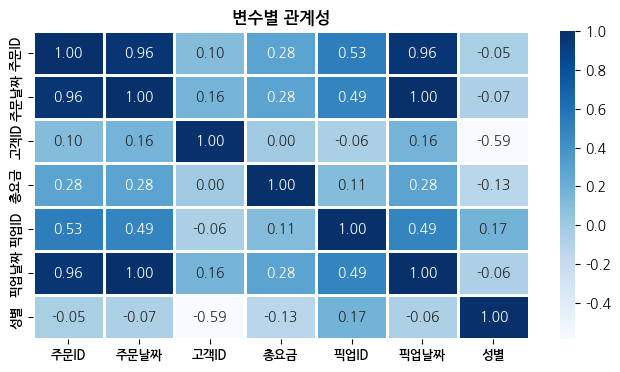

In [ ]:
# Heat Map: 변수별 상관관계를 2차원 형태로 표현하는 시각화 방법

plot_option()
plt.title('변수별 관계성', fontweight='bold')
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=.8, cmap='Blues')

# Missing Value 확인
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

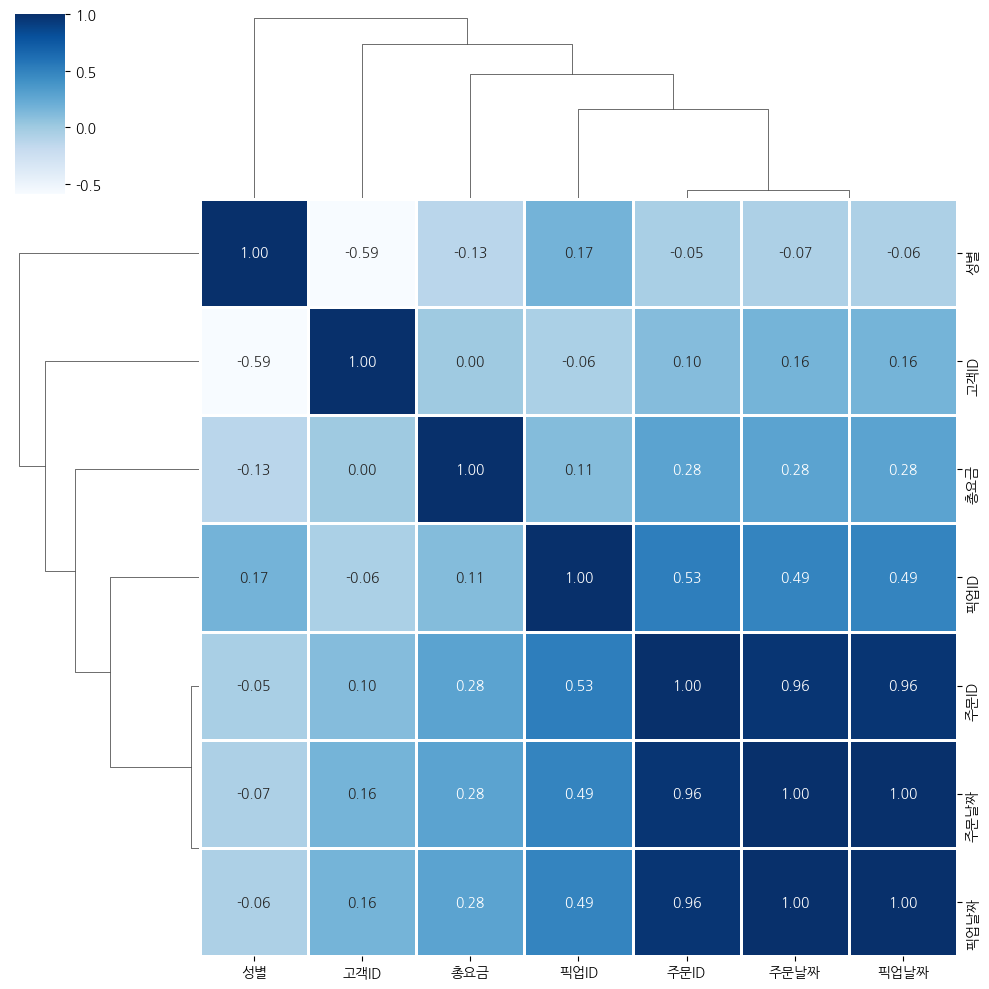

In [ ]:
# 계측적 클러스터링(Hiearchical Clustering): 행렬 데이터를 갖고있어 유사성에 따라 몇몇 특징들을 그룹화하는 시각화 방법

sns.clustermap(df.corr(), annot=True, fmt='.2f', linewidths=.8, cmap='Blues')

## **Multi-plot Grid**
  - Grid plot은 시각화에 대한 제어력을 높이고 코드 한 줄로 다양한 그래프를 표시

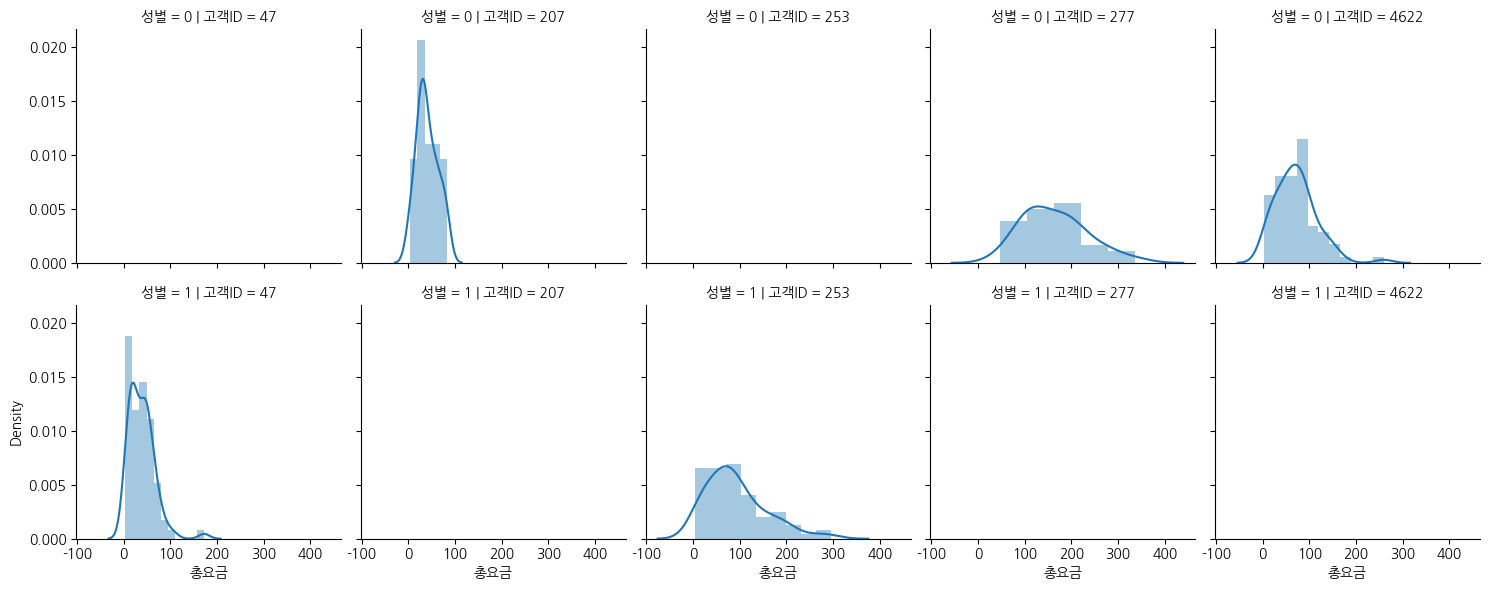

In [ ]:
# Facet Grid:
# 1. 어떤 조건에 따라 그래프를 각각 확인해보고 싶을 때 사용하는 시각화 방법
# 2. 성별과 고객ID에 따라 총요금을 얼마나 지불했는지 확인하는 시각화 방법

sns.FacetGrid(df, col='고객ID', row='성별').map(sns.distplot,'총요금')

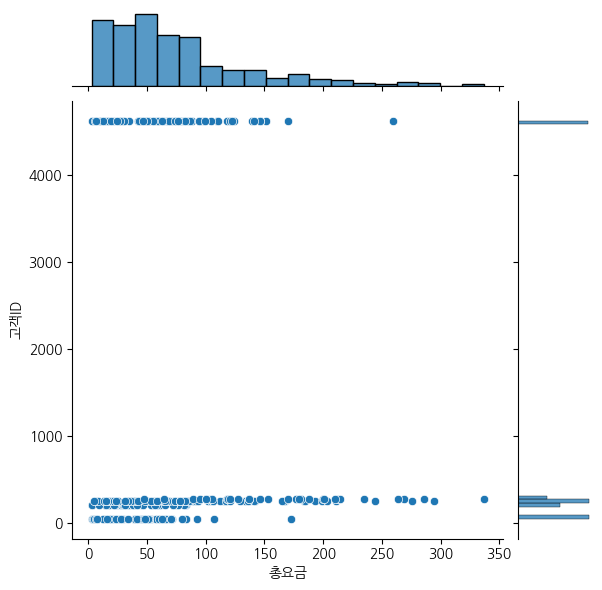

In [ ]:
# Joint Plot
# 1. 두 변수에 대한 분포를 표현하는 시각화 방법(즉, displot)
# 2. displot 사이에 scatter plot이 추가되어 분포를 추가 확인 가능
# 3. scatter plot 대신 hex plot으로 정의 가능

sns.jointplot(x=df['총요금'], y=df['고객ID'], kind='scatter')

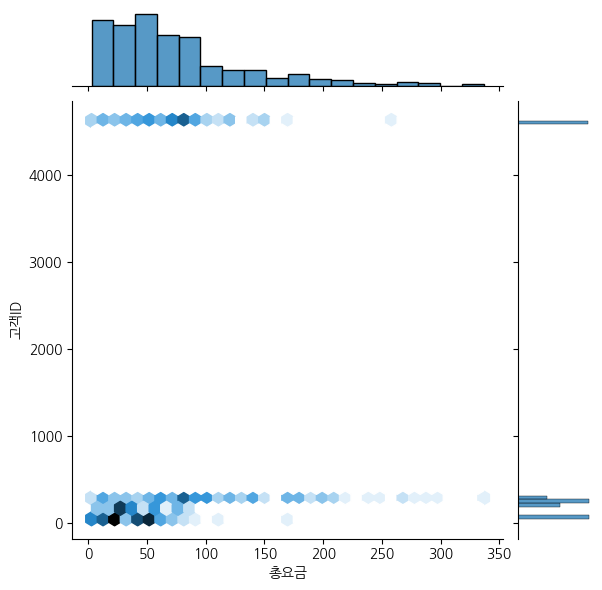

In [ ]:
# scatter plot 대신 hex plot으로 정의할 수 있다.
sns.jointplot(x=df['총요금'], y=df['고객ID'], kind='hex')

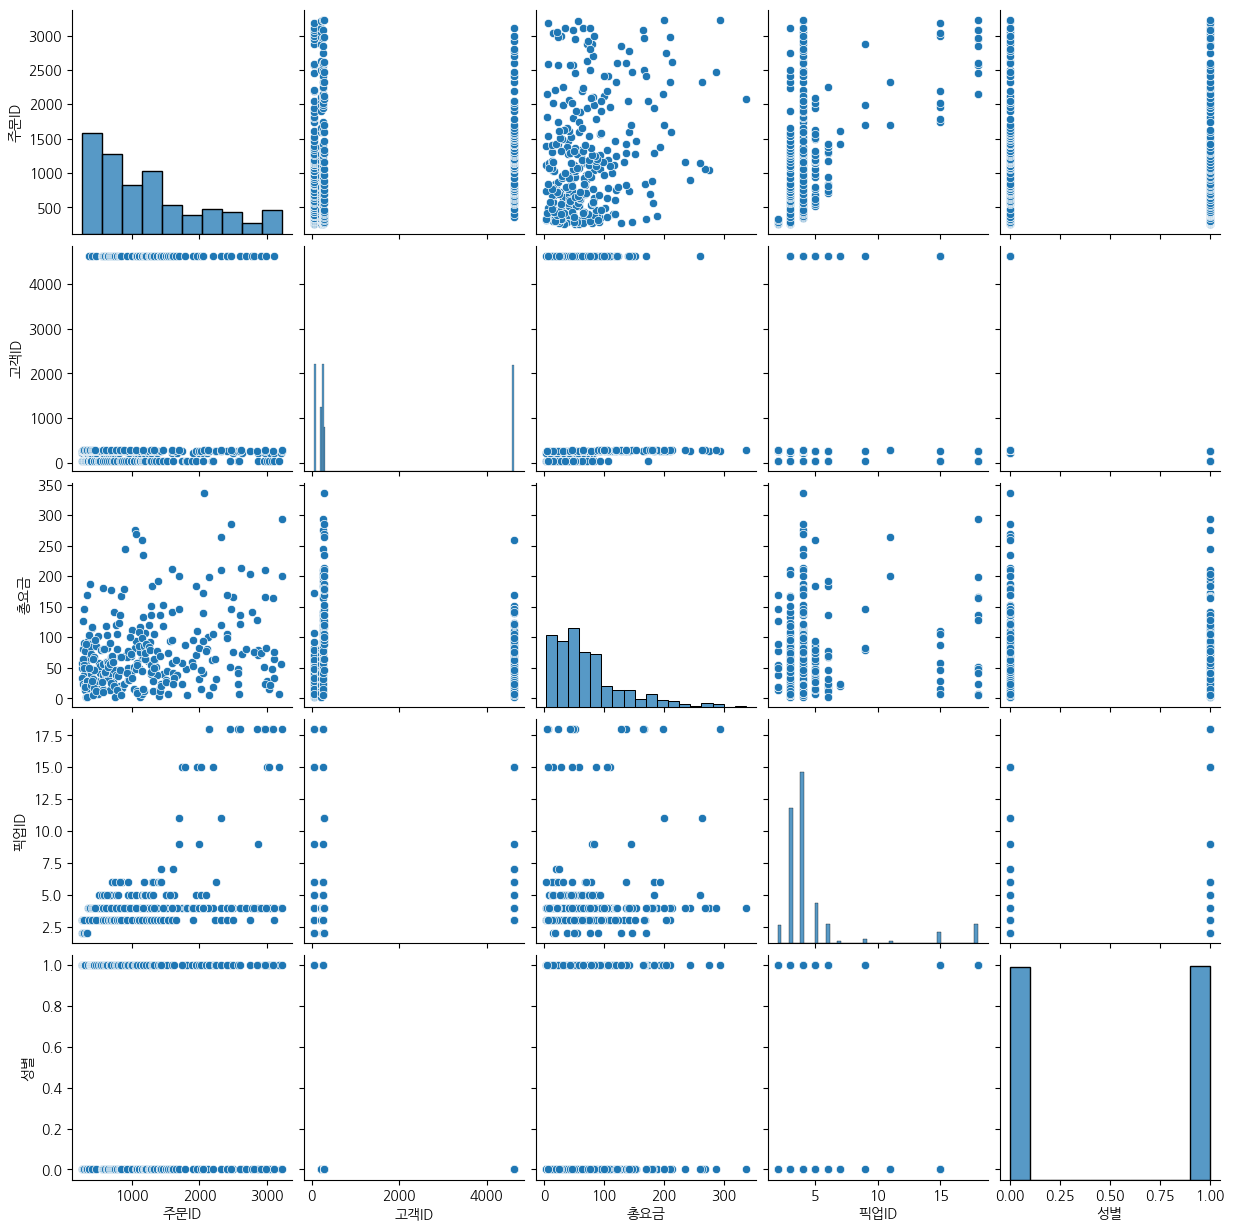

In [ ]:
# Pair Plot:
# 데이터셋을 통째로 넣어 숫자형 특성에 대해 각각에 대한 히스토그램과 두 변수 사이의 scatter plot를 표현

sns.pairplot(df)

In [ ]:
# 본 과정을 통해 seaborn 라이브러리를 활용한 시각화 방법 확인했다.
# 이번 과정에서 데이터 시각화를 수행하면서 데이터를 탐색하여 데이터에 대한 이해력을 높일 수 있는 기회였다.
# 특히, ML모델링, 데이터분석 등 과정에서 수행되는 전처리에서 우선시하는 결측치, 이상치를 식별하는 이점이 있음을 확인했다.

---